In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [7]:
df = pd.read_csv('C:\Harish\DATA SCIENCE COURSE\Course\Major Projects\House Price Prediction\data\processed\processed_data_with_features.csv')
print(df.shape)

(2930, 75)


<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\bhmrk\AppData\Local\Temp\ipykernel_24712\956113949.py:1: SyntaxWarning: invalid escape sequence '\H'
  df = pd.read_csv('C:\Harish\DATA SCIENCE COURSE\Course\Major Projects\House Price Prediction\data\processed\processed_data_with_features.csv')


In [6]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,RemodAge,GarageAge,QualityScore,HasPool,HasGarage,HasFireplace,HasPorch,HasDeck,HasBsmt,HasRemodel
0,-0.877005,RL,3.072506,2.744381,Pave,NaN,IR1,Lvl,AllPub,Corner,...,2.841987,2.388912,0.034079,0,1,1,0,1,1,1
1,-0.877005,RH,0.461265,0.187097,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2.794041,2.349733,-0.305069,0,1,0,1,1,0,1
2,-0.877005,RL,0.504073,0.522814,Pave,NaN,IR1,Lvl,AllPub,Corner,...,2.937879,2.467270,-0.026437,0,0,0,0,1,1,1
3,-0.877005,RL,1.017759,0.128458,Pave,NaN,Reg,Lvl,AllPub,Corner,...,2.458418,2.075479,-0.325096,0,1,1,0,0,1,1
4,0.061285,RL,0.204422,0.467348,Pave,NaN,IR1,Lvl,AllPub,Inside,...,1.020033,0.939285,0.393253,0,1,1,0,1,0,1


In [18]:
df.select_dtypes(include='object').columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating',
       'Central Air', 'Electrical', 'Fireplace Qu', 'Garage Type', 'Pool QC',
       'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [19]:
df = pd.get_dummies(df, drop_first=True)

In [21]:
print(df.select_dtypes(include='object').columns)

Index([], dtype='object')


In [27]:
df.isnull().sum().sum()

np.int64(837)

- We still got null values after we did one-hot encoding on some categorical columns
- So, we need to do imputing for X_train and X_test using Simple Imputer which can be imported by sklearn.impute

In [22]:
# Defining features and target columns 
drop_columns = [col for col in ['SalePrice', 'PID', 'Order'] if col in df.columns]

X = df.drop(columns = drop_columns)
y = df['SalePrice']

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

X = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2344, 214), (586, 214), (2344,), (586,))

In [33]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01)
}

In [35]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    re = r2_score(y_test, y_pred)

    print(f"{name}")
    print(f"RMSE: {rmse: .2f}")
    print(f"MAE: {mae: .2f}")
    print(f"R2: {re: .2f}")
    print("-" * 30)

Linear Regression
RMSE:  30928.12
MAE:  17854.23
R2:  0.88
------------------------------
Ridge Regression
RMSE:  30977.66
MAE:  18424.50
R2:  0.88
------------------------------
Lasso Regression
RMSE:  30993.35
MAE:  17988.95
R2:  0.88
------------------------------


c:\Harish\DATA SCIENCE COURSE\Course\Major Projects\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.621e+11, tolerance: 1.394e+09
  model = cd_fast.enet_coordinate_descent(


#### Interpretations

##### Linear Regression

C:\Users\bhmrk\AppData\Local\Temp\ipykernel_24712\1960823096.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lin_coef_df.head(20), x='Coefficient', y='Feature', palette='coolwarm')


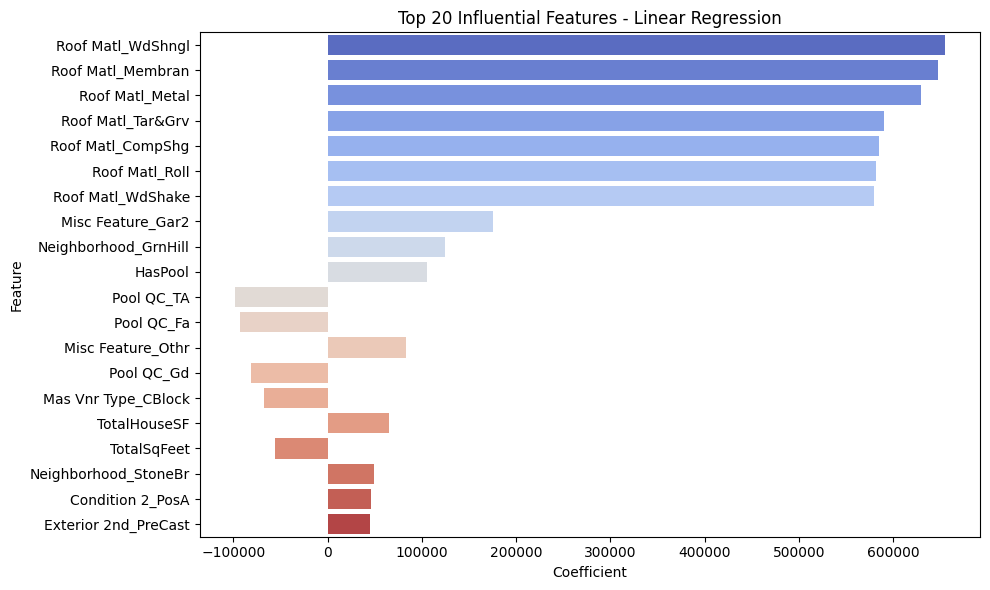

In [39]:
linear_model = models['Linear Regression']

lin_coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})
lin_coef_df['Abs_Coefficient'] = lin_coef_df['Coefficient'].abs()
lin_coef_df = lin_coef_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=lin_coef_df.head(20), x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Top 20 Influential Features - Linear Regression')
plt.tight_layout()
plt.show()


In [48]:
print('GrLivArea' in X.columns)
'GrLivArea' in df.columns

# plt.figure(figsize=(8, 6))
# plt.scatter(X['GrLivArea'], y, alpha=0.4)
# plt.plot(X['GrLivArea'], linear_model.predict(X), color='red', linewidth=2)
# plt.xlabel('GrLivArea')
# plt.ylabel('SalePrice')
# plt.title('Linear Regression Fit Line on GrLivArea')
# plt.tight_layout()
# plt.show()

False


False

In [ ]:

raw_df = pd.read_csv(r'C:\Harish\DATA SCIENCE COURSE\Course\Major Projects\House Price Prediction\data\raw\AmesHousing.csv')


df['GrLivArea'] = raw_df['Gr Liv Area'].copy()
X['GrLivArea'] = df['GrLivArea']


#### **Linear Regression** plots

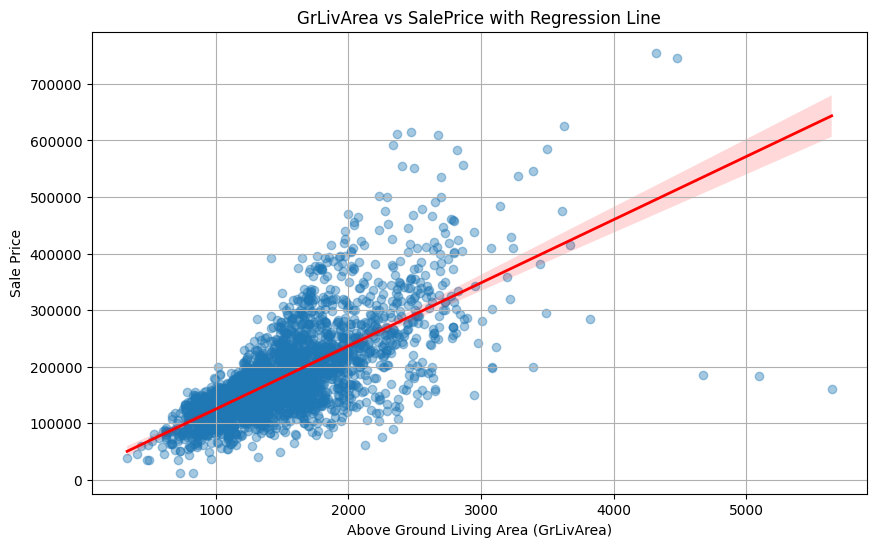

In [60]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='GrLivArea',
    y='SalePrice',
    data=df,
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title('GrLivArea vs SalePrice with Regression Line')
plt.xlabel('Above Ground Living Area (GrLivArea)')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()


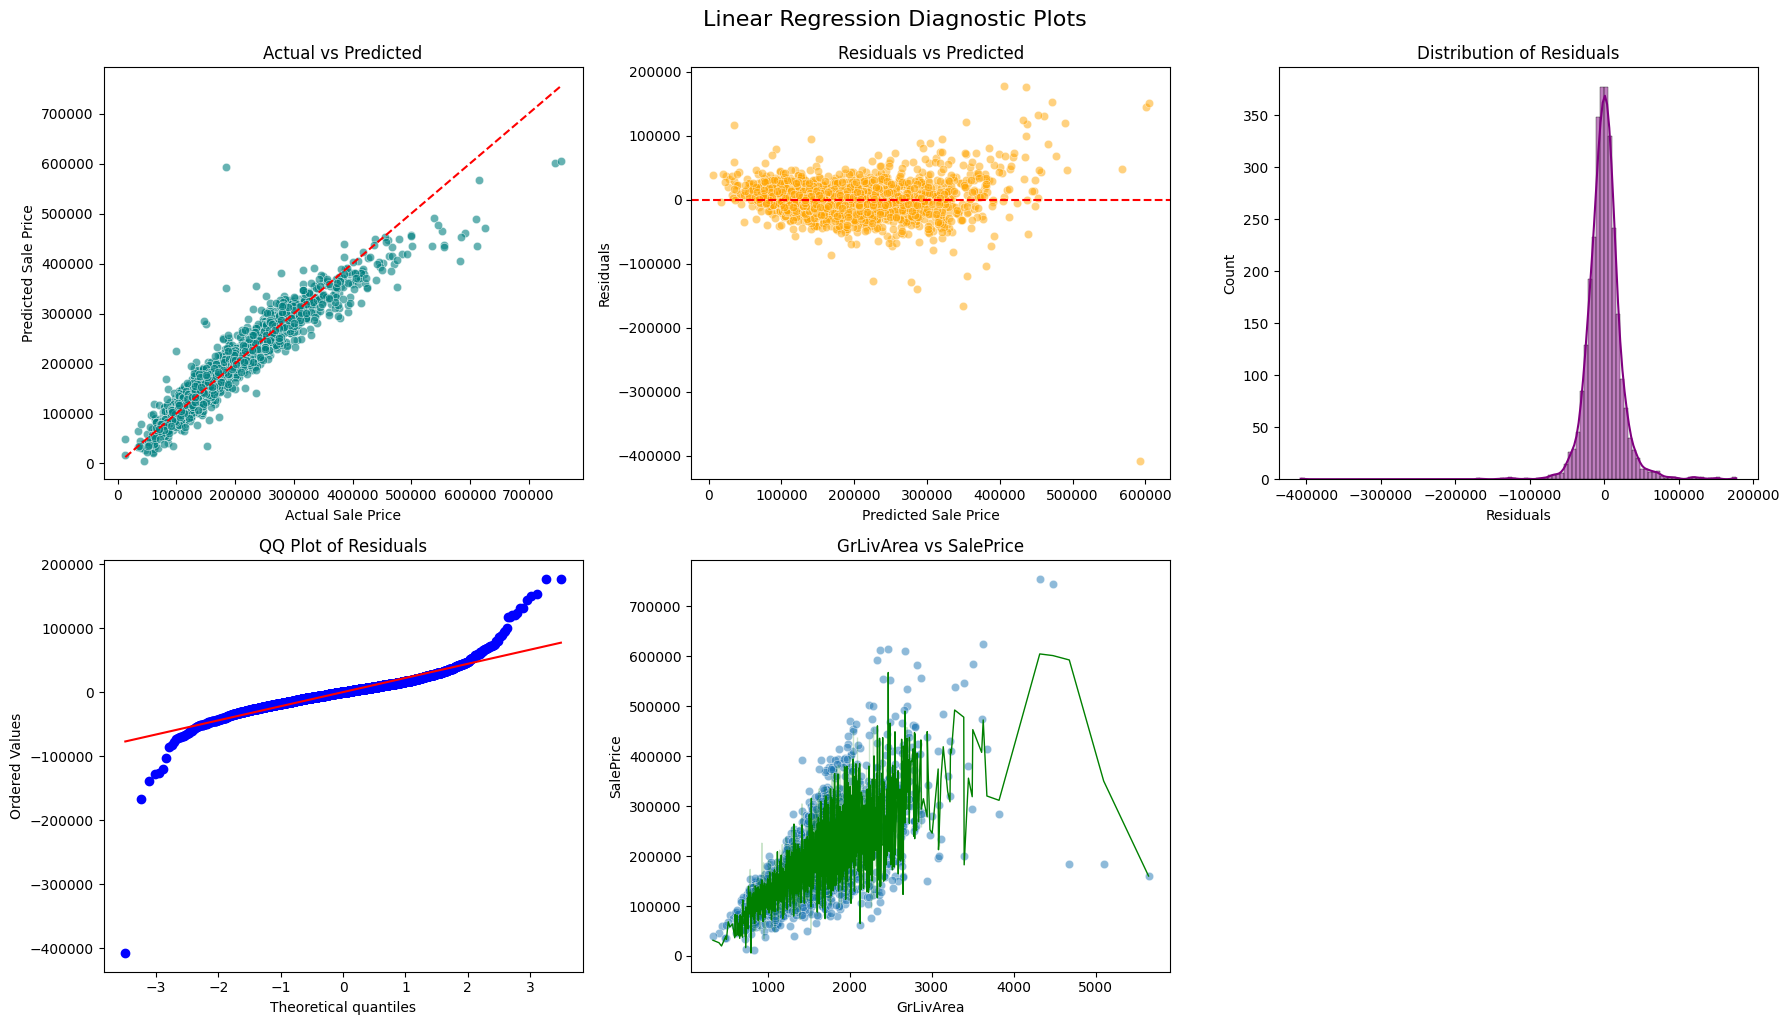

In [69]:
# Removing GrLivArea for prediction as it was not used in training
X_predict = X.drop(columns=['GrLivArea']) if 'GrLivArea' in X.columns else X
y_pred_linear = linear_model.predict(X_predict)
residuals = y - y_pred_linear

# 2x3 grid for plots
plt.figure(figsize=(18, 10))

# 1. Actual vs Predicted
plt.subplot(2, 3, 1)
sns.scatterplot(x=y, y=y_pred_linear, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted")

# 2. Residuals vs Predicted
plt.subplot(2, 3, 2)
sns.scatterplot(x=y_pred_linear, y=residuals, alpha=0.5, color='orange')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")

# 3. Histogram of Residuals
plt.subplot(2, 3, 3)
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")

# 4. QQ Plot (Normality of residuals)
from scipy import stats
plt.subplot(2, 3, 4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")

# 5. Feature vs Target (GrLivArea if available)
plt.subplot(2, 3, 5)
if 'GrLivArea' in df.columns:
    sns.scatterplot(x=df['GrLivArea'], y=y, alpha=0.5)
    sns.lineplot(x=df['GrLivArea'], y=linear_model.predict(X_predict), color='green', linewidth=1)
    plt.xlabel("GrLivArea")
    plt.ylabel("SalePrice")
    plt.title("GrLivArea vs SalePrice")
else:
    plt.text(0.3, 0.5, "GrLivArea not available", fontsize=12)

plt.tight_layout()
plt.suptitle("Linear Regression Diagnostic Plots", fontsize=16, y=1.02)
plt.show()


#### **Ridge Regression** plots

In [71]:
# Remove GrLivArea only for prediction
X_ridge = X.drop(columns=['GrLivArea'])

ridge_model = models['Ridge Regression']

y_pred_ridge = ridge_model.predict(X_ridge)
residuals_ridge = y - y_pred_ridge

In [72]:
# Re-train Ridge on updated X with GrLivArea
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

y_pred_ridge = ridge_model.predict(X)
residuals_ridge = y - y_pred_ridge


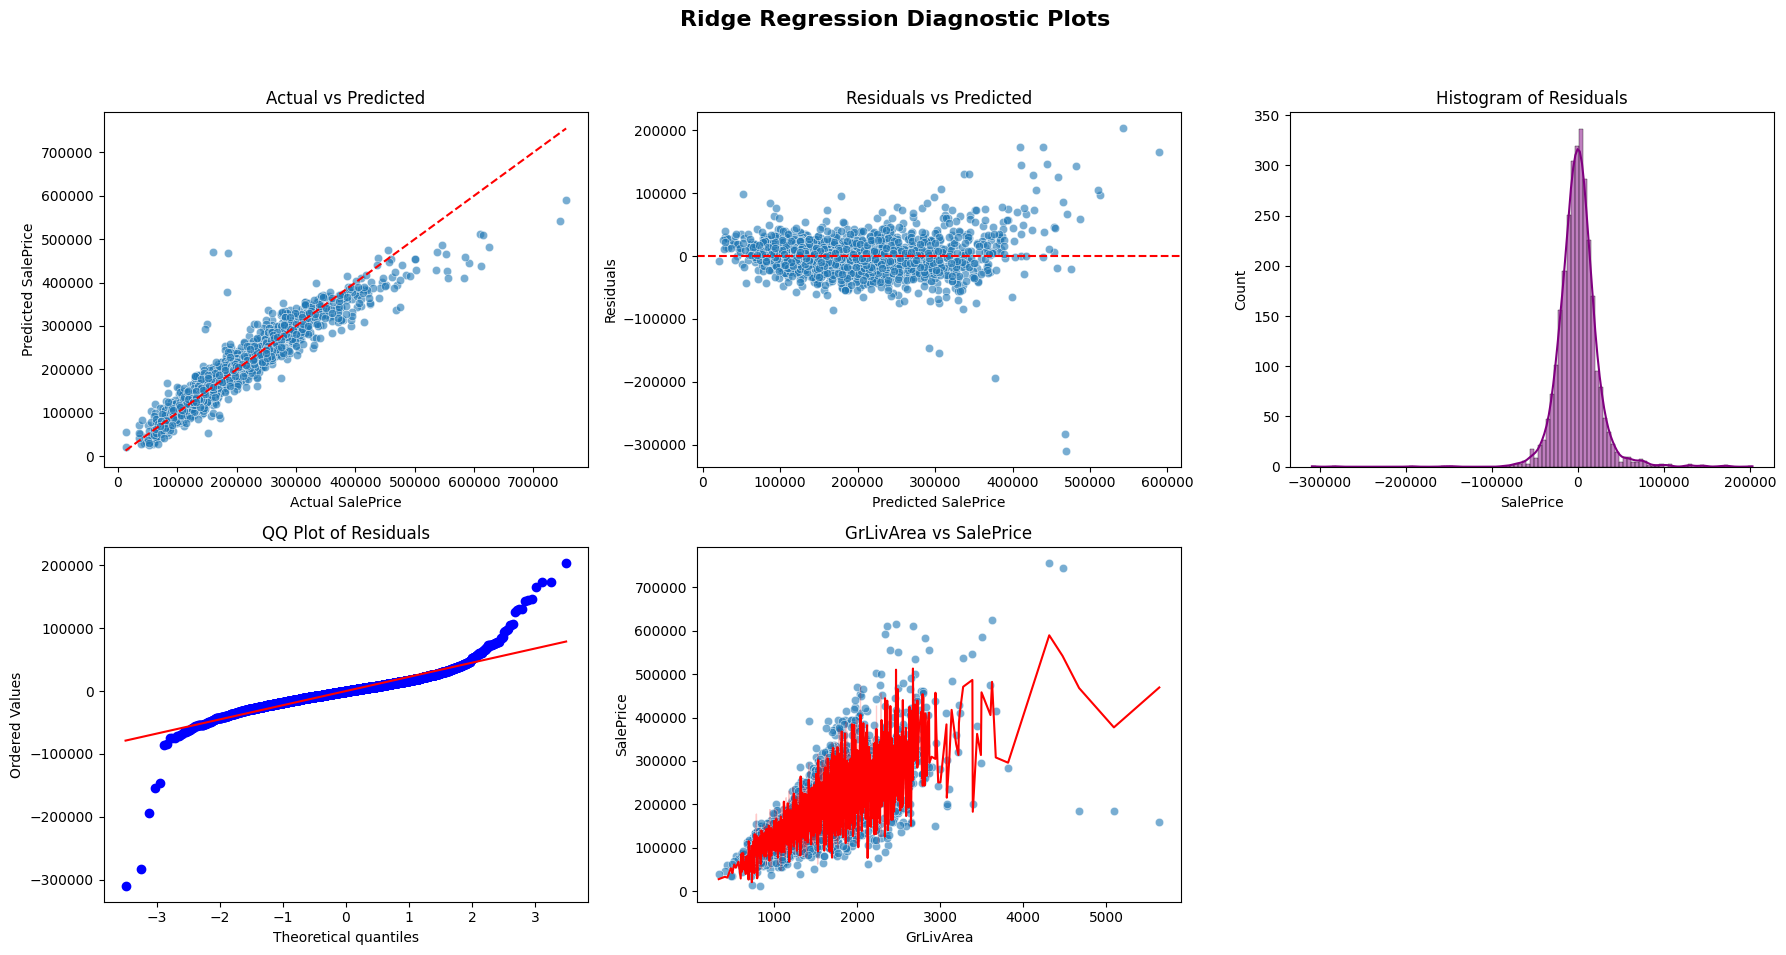

In [81]:

import scipy.stats as stats

y_pred_ridge = ridge_model.predict(X)

# Residuals
residuals_ridge = y - y_pred_ridge

# Dashboard Layout
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Ridge Regression Diagnostic Plots", fontsize=16, fontweight='bold')

# 1. Actual vs Predicted
sns.scatterplot(x=y, y=y_pred_ridge, ax=axes[0, 0], alpha=0.6)
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
axes[0, 0].set_title("Actual vs Predicted")
axes[0, 0].set_xlabel("Actual SalePrice")
axes[0, 0].set_ylabel("Predicted SalePrice")

# 2. Residuals vs Predicted
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge, ax=axes[0, 1], alpha=0.6)
axes[0, 1].axhline(0, color='r', linestyle='--')
axes[0, 1].set_title("Residuals vs Predicted")
axes[0, 1].set_xlabel("Predicted SalePrice")
axes[0, 1].set_ylabel("Residuals")

# 3. Histogram of Residuals
sns.histplot(residuals_ridge, kde=True, ax=axes[0, 2], color='purple')
axes[0, 2].set_title("Histogram of Residuals")

# 4. QQ Plot
stats.probplot(residuals_ridge, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title("QQ Plot of Residuals")

# 5. Feature vs Target (GrLivArea)
sns.scatterplot(x=X['GrLivArea'], y=y, ax=axes[1, 1], alpha=0.6)
sns.lineplot(x=X['GrLivArea'], y=y_pred_ridge, ax=axes[1, 1], color='red')
axes[1, 1].set_title("GrLivArea vs SalePrice")
axes[1, 1].set_xlabel("GrLivArea")
axes[1, 1].set_ylabel("SalePrice")

# Remove the last empty plot
axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


##### **Lasso Model** plots

In [74]:
lasso_model = models['Lasso Regression']

In [75]:
# Drop GrLivArea for prediction if it was added after model training
X_lasso = X.drop(columns=['GrLivArea'])

# Predict
y_pred_lasso = lasso_model.predict(X_lasso)

# Residuals
residuals_lasso = y - y_pred_lasso


C:\Users\bhmrk\AppData\Local\Temp\ipykernel_24712\2352292733.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lasso_coef_df.head(10), x='Coefficient', y='Feature', palette='viridis')


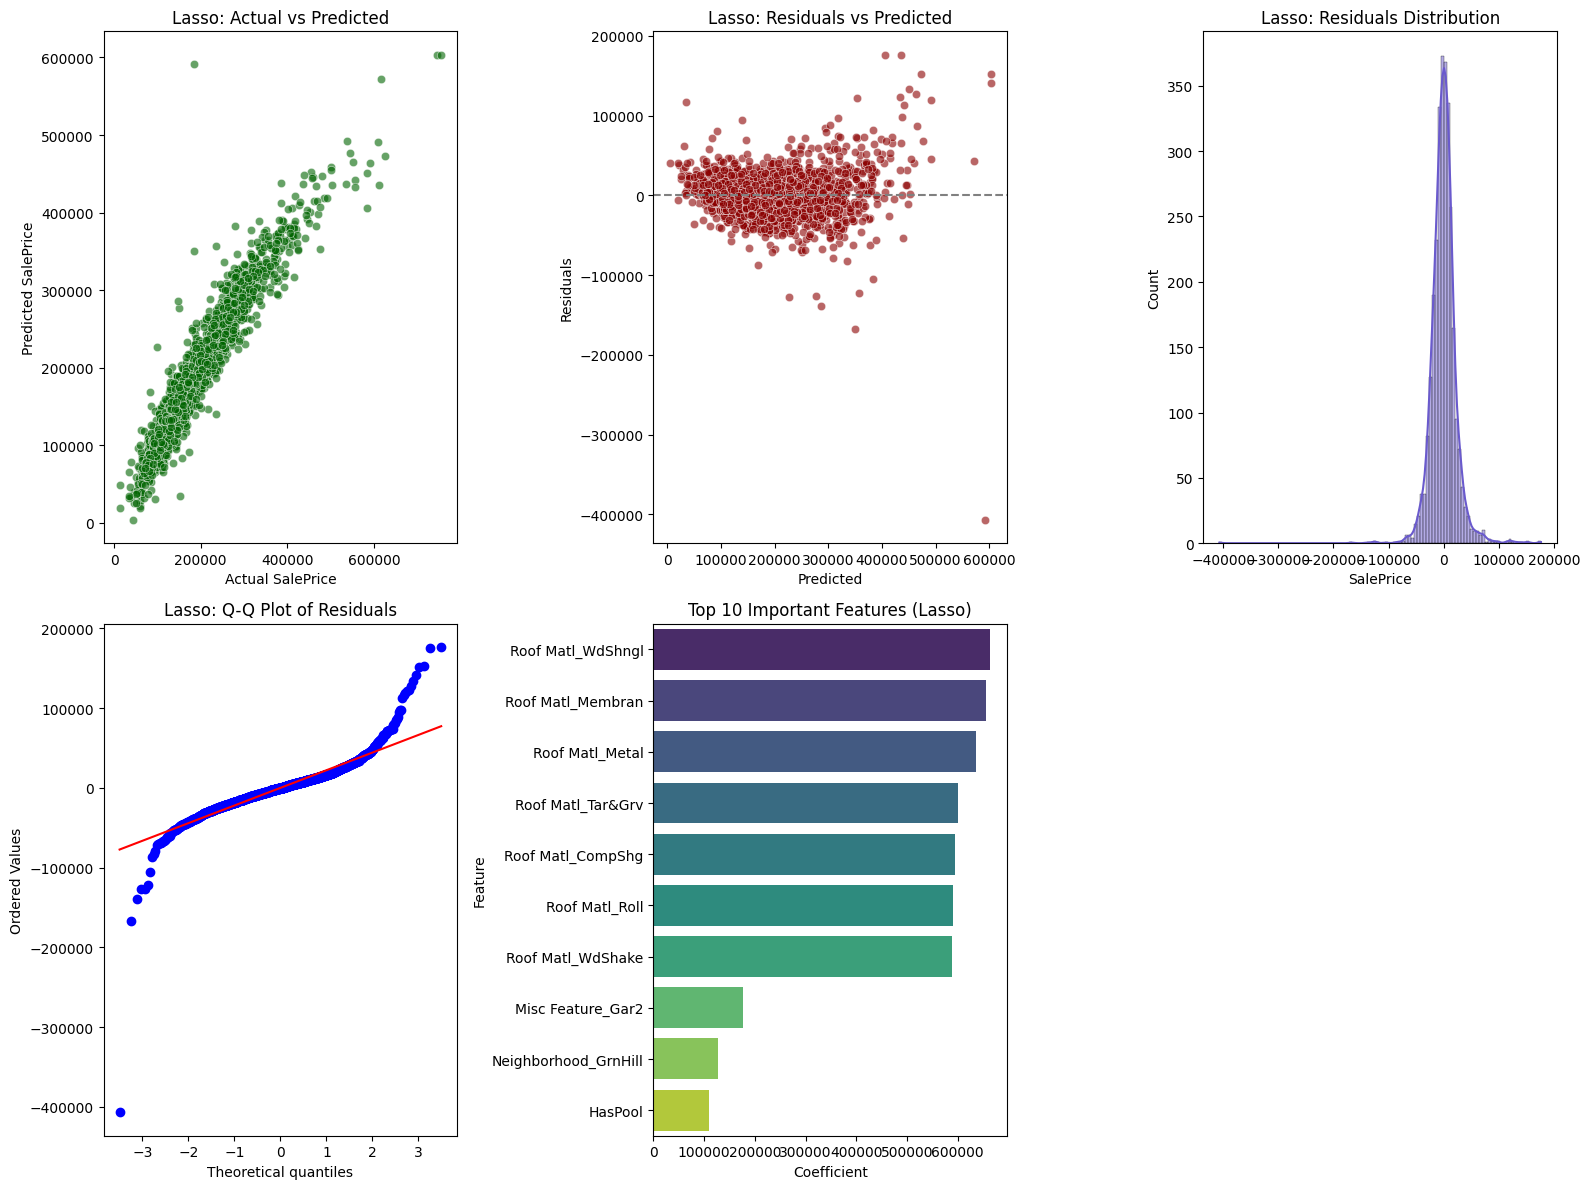

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.figure(figsize=(16, 12))

# Scatter plot: Actual vs Predicted
plt.subplot(2, 3, 1)
sns.scatterplot(x=y, y=y_pred_lasso, alpha=0.6, color='darkgreen')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Lasso: Actual vs Predicted')

# Residual plot
plt.subplot(2, 3, 2)
sns.scatterplot(x=y_pred_lasso, y=residuals_lasso, alpha=0.6, color='darkred')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Lasso: Residuals vs Predicted')

# Distribution of residuals
plt.subplot(2, 3, 3)
sns.histplot(residuals_lasso, kde=True, color='slateblue')
plt.title('Lasso: Residuals Distribution')

# Q-Q plot
plt.subplot(2, 3, 4)
stats.probplot(residuals_lasso, dist="norm", plot=plt)
plt.title('Lasso: Q-Q Plot of Residuals')

# Coefficients
plt.subplot(2, 3, 5)
lasso_coef_df = pd.DataFrame({
    'Feature': X_lasso.columns,
    'Coefficient': lasso_model.coef_
})
lasso_coef_df = lasso_coef_df[lasso_coef_df['Coefficient'] != 0]  # Only non-zero features
lasso_coef_df = lasso_coef_df.sort_values(by='Coefficient', key=abs, ascending=False)
sns.barplot(data=lasso_coef_df.head(10), x='Coefficient', y='Feature', palette='viridis')
plt.title('Top 10 Important Features (Lasso)')

plt.tight_layout()
plt.show()
